## 用户指南

这个用户指南会协助你学会一些matplotlib基本的使用和最佳实践，以帮助你能快速上手matplotlib。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

一个Figure 包含一个或多个Axes,一个Axes可以二维的x-y坐标，也可以是x-y-z 3D的图像，可以使用pyplot.subplots()创建至少含有一个axes的figure，接着可以使用Axes.plot在axes上画出数据对应的图像。

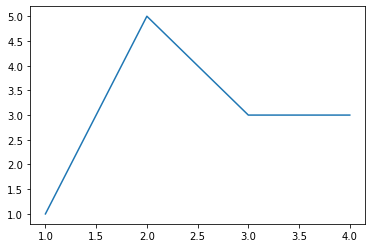

In [2]:
fig, ax = plt.subplots() #创建figure和一个axes
ax.plot([1,2,3,4],[1,5,3,3]) # 为这个axes值x-y数据
plt.show()

### 1、Matplotlib的Figure架构图 

![image.png](./images/Matplotlib-structure-figure.jpg)

### 2、关键类介绍

#### 2.1、Figure

一个figure可以包含任意多个Axes，下面用pyplot创建一个最简单的figure

它是用来创建 总画布:figure “窗口”的，有figure就可以在上边（或其中一个子网格:subplot上）作图了，（fig：是figure的缩写）。

plt.subplot(111)是plt.subplot(1, 1, 1)另一个写法而已，更完整的写法是  plt.subplot(nrows=1, ncols=1, index=1 ) 

fig, ax = plt.subplots()等价于fig, ax = plt.subplots(11)

fig, axes = plt.subplots(23)：即表示一次性在figure上创建成2*3的网格，使用plt.subplot()只能一个一个的添加：

<Figure size 432x288 with 0 Axes>

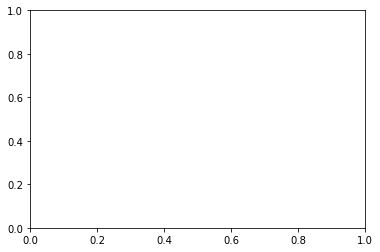

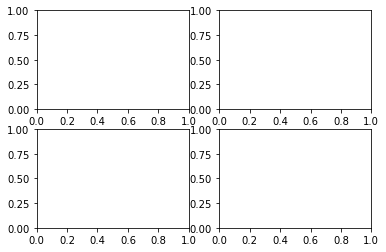

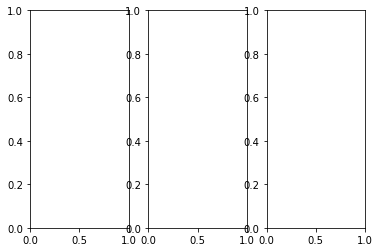

In [8]:
fig = plt.figure() # 创建一个不包含Axes的空figure
fig, ax = plt.subplots() # 创建一个只包含一个Axes的figure
fig, axs = plt.subplots(2, 2) # 创建一个包含2 * 2网格的Axes的figure
fig, axss = plt.subplots(1, 3) # 创建一个包含1 * 3网格的Axes的figure
plt.show()

#### 2.2、Axes

一个plot就是一个带着数据的图像区域，一个figure可以包含多个Axes，但一个Axes只能对应一个figure，一个Axes包含两个Axis（请注意Axes与Axis的不同），注意 data可以通过 axes.Axes.set_xlim() and axes.Axes.set_ylim() 两个方法加以限制。每一个Axes可以通过set_title()来设置标题，通过set_xlabel()设置x轴的标签，通过set_ylabel()设置y轴的标签。

#### 2.3、Axis

In [9]:
# 现在还不太理解，后补

#### 2.4、Artist

In [10]:
# 现在还不太理解，后补